In [ ]:
#用tensor和autograd实现一个线性回归的训练
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

解决一个两个特征的线性回归问题

### 生成一个模拟数据集  
其内部：样本数（num_examples）=1000，输入特征（num_inputs）=2  
设定一组w和b，得到对应的y

In [11]:
#生成数据集
#构建一个人工训练数据集
# 样本数为1000，特征数为2，使用线性回归模型真实权重w1=2，w2=-3.4，b=4.2，还有一个随机噪声来生成标签
# 随机噪声服从均值为0，标准差为0.01的正态分布

In [12]:
num_inputs = 2# 样本数为1000，
num_examples = 1000#特征数为2
true_w = [2,-3.4]#真实的weight
true_b = 4.2#真实的bias
features = torch.randn(num_examples,num_inputs,dtype=torch.float32)#随机生成1000个2个特征的输入样本
labels = true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b#根据线性运算得到labels
labels +=torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float32)#添加一些杂质

设定好数据集后，可以看到features和labels都是tensor类型  
一行是一组数据

In [22]:
print(features[0],labels[0])

tensor([1.0685, 0.1836]) tensor(5.7318)


画图可以更直观的看到x2和y的线性关系

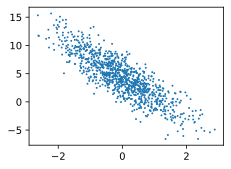

In [14]:
#在d2lzh_pytorch.py中有定义函数
import sys
sys.path.append("..")
from d2lzh_pytorch import * 
set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)



设定一个读取数据的函数，这个函数可以随机将数据分成一个个batch。

In [ ]:
#读取数据
#在d2lzh_pytorch.py中同样有定义函数，实现返回batch——size大小个随机样本的特征和标签
batch_size = 10
for X,y in data_iter(batch_size,features,labels):
    print(X,y)
    break

tensor([[ 0.1775,  1.4528],
        [-1.5794, -0.5295],
        [-0.1113, -0.0342],
        [-0.1123,  1.8215],
        [ 0.9037,  2.0815],
        [-0.5082, -0.6882],
        [ 0.3023, -0.5117],
        [ 3.0159, -0.8987],
        [ 0.2289,  0.5129],
        [-0.1319,  0.1253]]) tensor([-0.3676,  2.8442,  4.0964, -2.2183, -1.0754,  5.5291,  6.5412, 13.3048,
         2.9096,  3.5006])


In [16]:
#初始化模型参数，将权重初始化为均值为0，标准差为0。01的正态随机数，偏差初始化成0
w = torch.tensor(np.random.normal(0,0.01,(num_inputs,1)),dtype= torch.float32)
b = torch.zeros(1,dtype=torch.float32)
#之后要对他们求梯度进行迭代，所以要设置requires_grad
w.requires_grad_(True)
b.requires_grad_(True)

tensor([0.], requires_grad=True)

In [17]:
#定义模型
#这里再d21zh_pytorch里面加了新的函数linreg（定义线性模型）

In [18]:
#定义损失函数
#在d21zh_pytorch添加squared_loss函数

In [19]:
#定义优化算法
#在d21zh_pytorch添加sgd函数

In [20]:

import sys
sys.path.append("..")
from d2lzh_pytorch import * 
#训练模型
# 多次迭代模型参数，每次迭代时，根据当前读取的batch，通过调用backward计算小批量随机梯度，在调用sgd迭代模型参数
lr = 0.03#learning rate
num_epochs = 3#训练轮次
net = linreg#线性模型
loss = squared_loss#loss函数

#迭代
for epoch in range(num_epochs):
    #获取一个batch里的样本
    for X,y in data_iter(batch_size,features,labels):
        #l是一个batch的损失，loss函数返回的是（batch，1）大小的向量，这里把一个批次的所有loss加起来
        #让l成为一个标量才能求grad
        l = loss(net(X,w,b),y).sum()
        l.backward()#损失对模型参数求梯度
        sgd([w,b],lr,batch_size)#利用sgd更新w和b
        #不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    # 一个epoch的所有训练loss
    #但是其实最后要的是平均，所以输出时取了mean
    train_l = loss(net(features,w,b),labels)
    #输出每个epoch的MSE
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.035941
epoch 2, loss 0.000132
epoch 3, loss 0.000048


In [21]:
#训练结束后，可以输出训练得到的参数和真实值比较一下
print(true_w,'\n',w)
print(true_b,'\n',b)

[2, -3.4] 
 tensor([[ 1.9999],
        [-3.4000]], requires_grad=True)
4.2 
 tensor([4.1999], requires_grad=True)


## Summary
根据以上的步骤，基本上可以把训练一个模型分成以下步骤
#### 1.准备数据集
#### 2.对数据集进行处理
#### 3.准备模型
#### 4.准备损失函数
#### 5.准备优化算法
#### 6.初始化权重
#### 7.由以上数据集，模型，损失函数，优化算法，初始化的权重进行训练